# Логистическая регрессия
Логистическая регрессия - метод бинарной классификации. Она позволяет классифицировать данные по двум классам. В этом материале мы познакомимся с реализацией логистической регресси в sklearn.

В этом примере в демонстративных целях мы будем использовать синтетические данные. Для генерации таких данных мы будем использовать функцию `make_blob`

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (100, 2)
y shape: (100,)


In [3]:
print('\nData samples:\n', X[:5, :])
print('\nTarget 5 labels:', y[:5])


Data samples:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

Target 5 labels: [1 1 0 0 1]


Данные могут быть визуализированы следующим образом

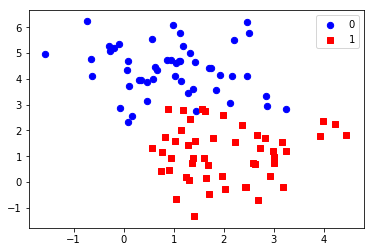

In [4]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.legend(loc='upper right');

Как было показано в предыдущих частья, перед обучением данные разбиваются на две части: обучающая выборка и тестовая выборка. Для этого используется функция `train_test_split`. Параметр `stratify` позволяет сохранит пропорцию классов в обоих наборах данных

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

print('X_train.shape: ', X_train.shape)
print('X_test.shape:  ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape:  ', y_test.shape)

X_train.shape:  (75, 2)
X_test.shape:   (25, 2)
y_train.shape:  (75,)
y_test.shape:   (25,)


Теперь можно создать непосредственно саму модель логистической регрессии для обучения. Для этого в sklearn используется класс `from sklearn.linear_model.LogisticRegression`

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

Для обучения необходимо вызвать функцию `fit`

In [7]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Наша модель готова. Теперь мы можем сделать предсказание на тестовых данных и проверить качество предсказания

In [8]:
prediction = model.predict(X_test)

Для начала можно просто вывести фактические и предсказанные значения для сравнения на глаз

In [9]:
print(prediction)
print(y_test)

[1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1]
[1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1]


Можно также сравнить фактические и предсказанные данные поэлементно и посчитать процент совпадений

In [10]:
np.mean(prediction == y_test)

0.95999999999999996

Процент совпадений можно посчитать с помощью готовой функции `score`

In [11]:
model.score(X_test, y_test)

0.95999999999999996

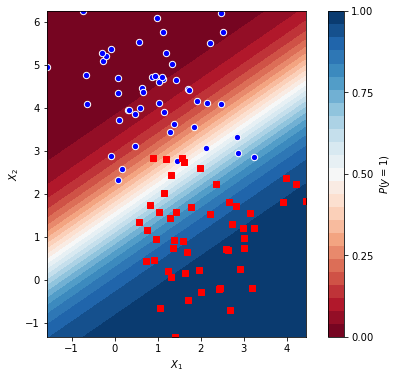

In [12]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

xx = np.linspace(x_min, x_max, 100)
yy = np.linspace(y_min, y_max, 100)

X1, X2 = np.meshgrid(xx, yy)

grid = np.c_[X1.ravel(), X2.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(X1.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X1, X2, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0', edgecolor="white", linewidth=1)
ax.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')
_ = ax.set(aspect="equal", xlim=(x_min, x_max), ylim=(y_min, y_max), xlabel="$X_1$", ylabel="$X_2$")